# **Недообучение и переобучение**

# Диагностика моделей классификации

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

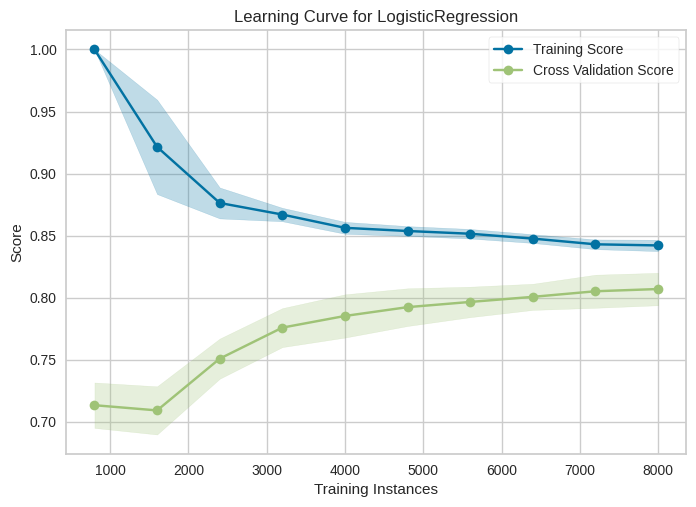

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


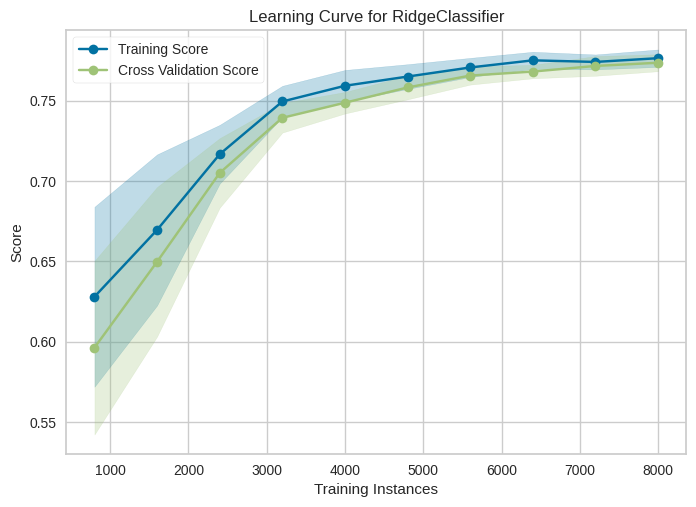

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

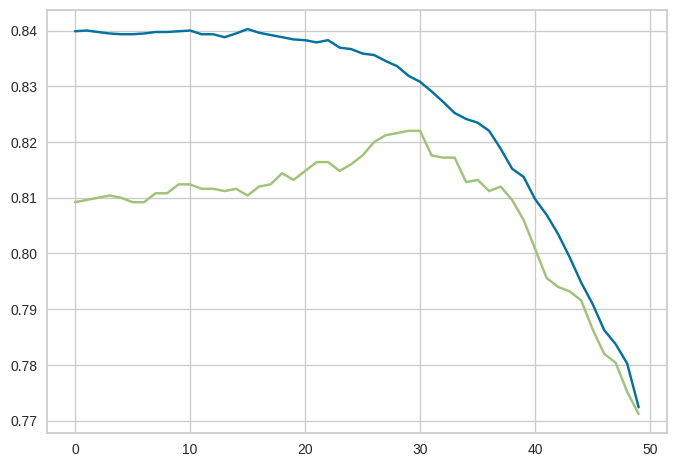

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


# Диагностика моделей регрессии

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

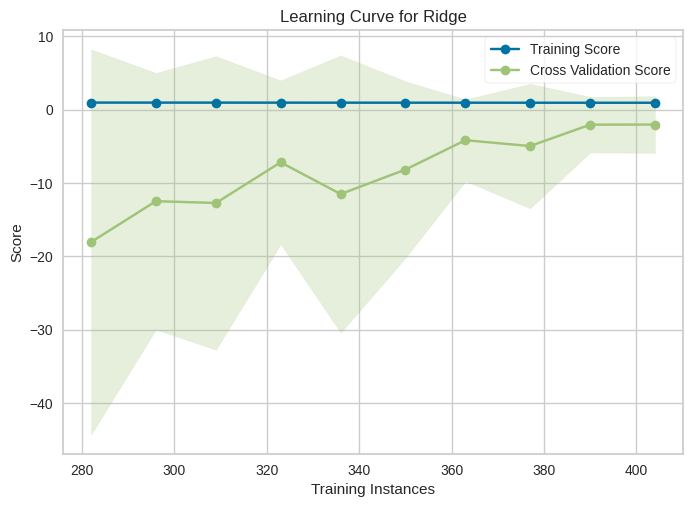

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

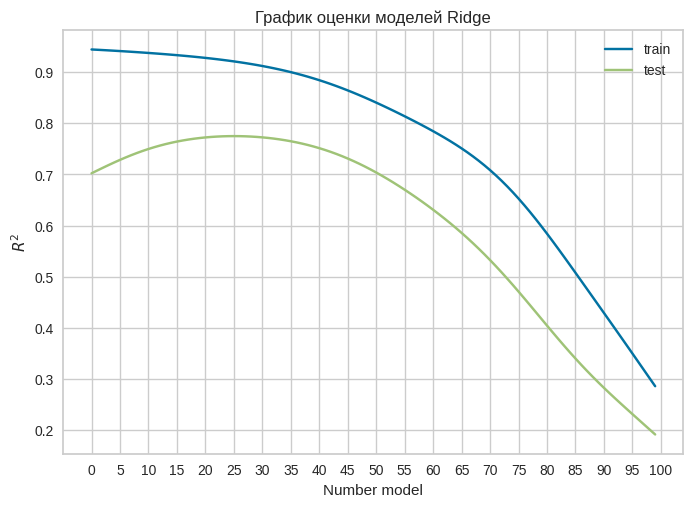

In [ ]:
trains = []
tests = []
l2 = []

for alpha in np.logspace(-2, 3, 100):
  ridge = Ridge(alpha=alpha).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))
  l2.append(alpha)

plt.plot(trains, label="train")
plt.plot(tests, label="test")

plt.title('График оценки моделей Ridge')
plt.ylabel('${R^2}$')
plt.xlabel('Number model')
plt.xticks(np.arange(0, 101, 5))

plt.legend()
plt.show()

In [ ]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


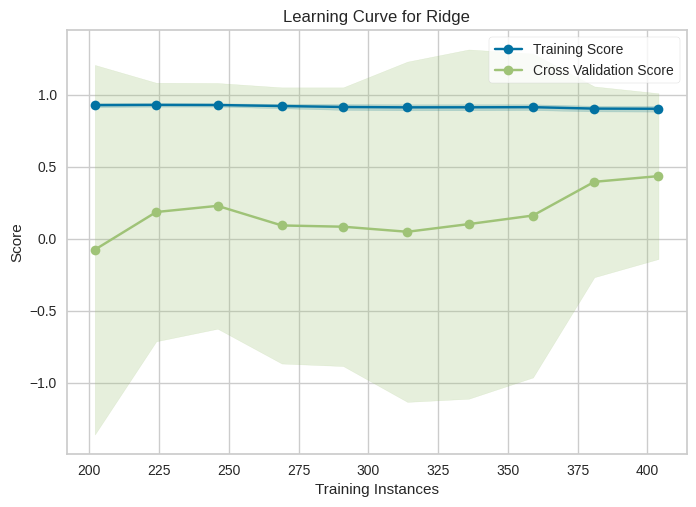

In [ ]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show()

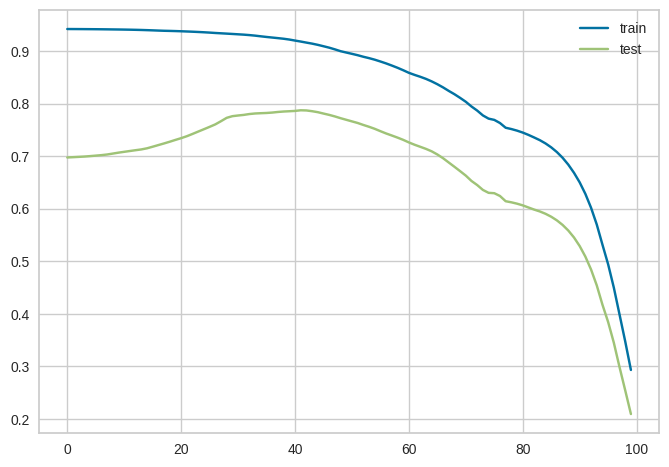

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# Диагностика на реальных данных

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


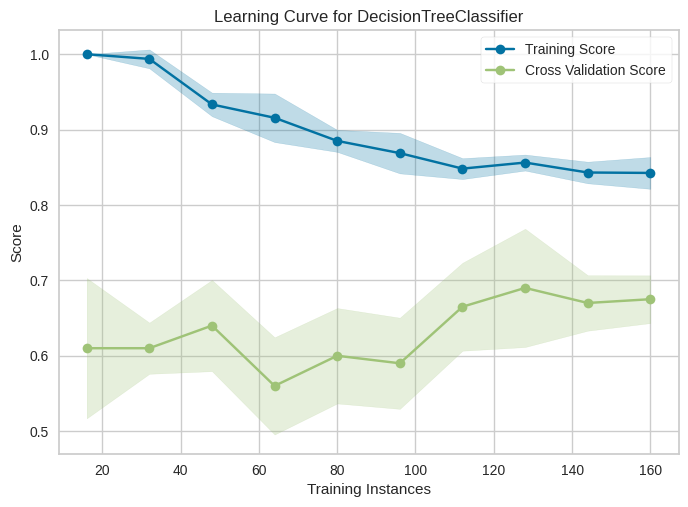

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


# Диагностика недообучения

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


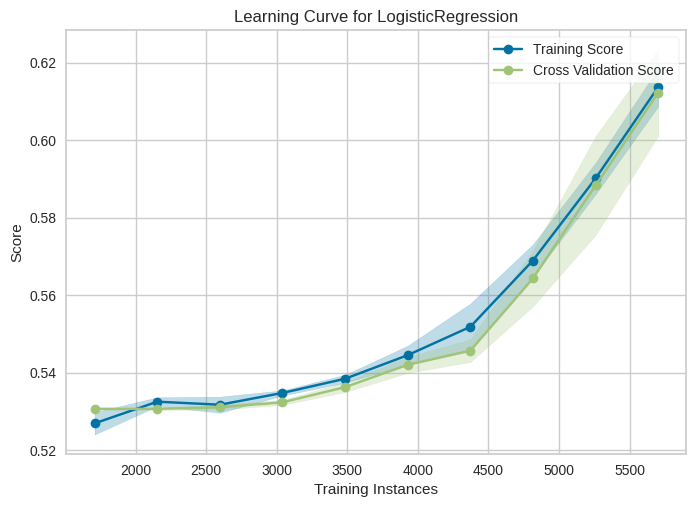

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9390
Test score = 0.9390


In [ ]:
visualizer = LearningCurve(
    model, scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# **Задания для самостоятельного выполнения**

1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

y_pred = lr.predict(X_train)

print('Training')
print(f"Score: {lr.score(X_train, y_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_pred):.4f}")
print(f"F1: {f1_score(y_train, y_pred):.4f}")
print('')
y_pred = lr.predict(X_test)

print('Test')
print(f"Score: {lr.score(X_test, y_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")

Training
Score: 0.8415
Precision: 0.8339
Recall: 0.8515
F1: 0.8426

Test
Score: 0.8056
Precision: 0.8069
Recall: 0.8056
F1: 0.8062


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


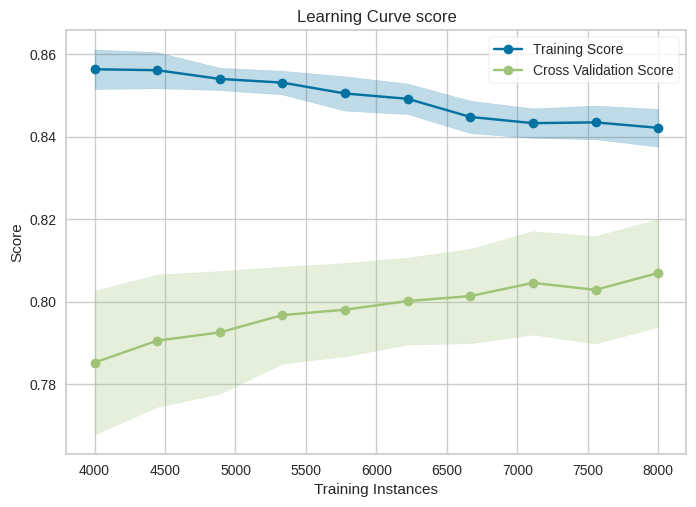

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


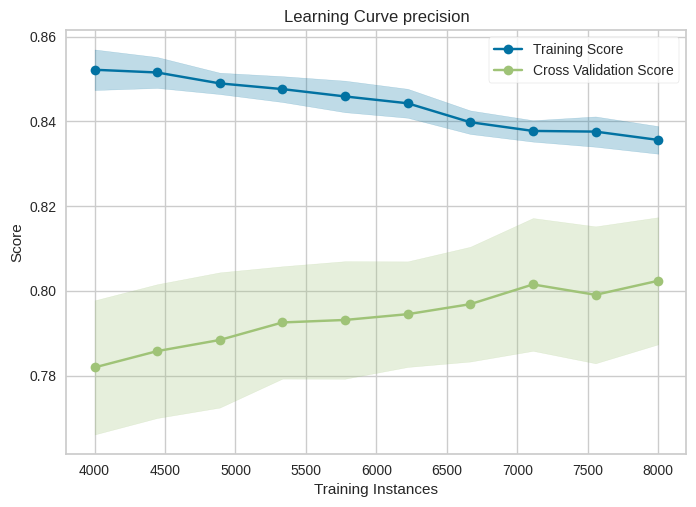

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


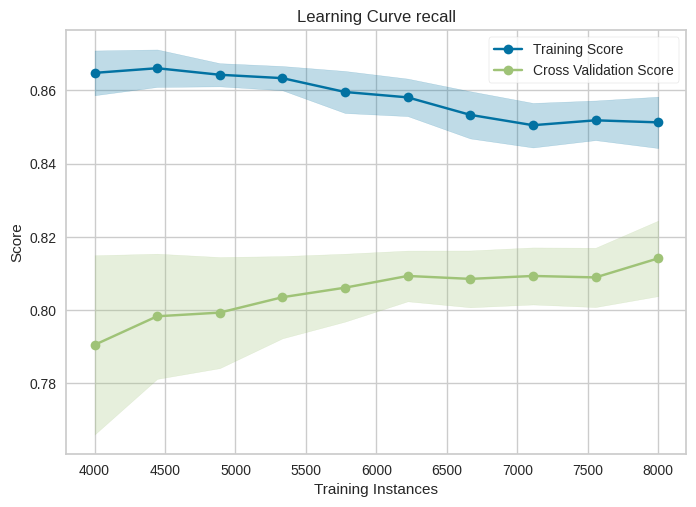

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


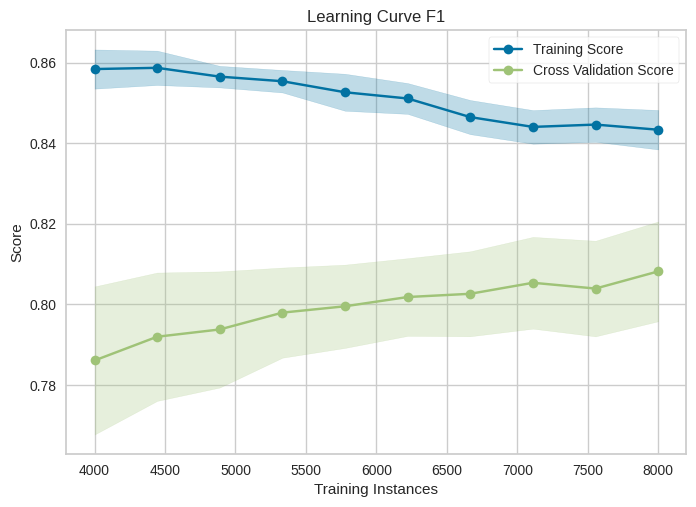

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer_score = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10),
    title="Learning Curve score"
).fit(X, y).show()

visualizer_precision = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10), scoring='precision',
    title="Learning Curve precision", ylabel="Precision"
).fit(X, y).show()

visualizer_recall = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10), scoring='recall',
    title="Learning Curve recall", ylabel="Recall"
).fit(X, y).show()

visualizer_f1 = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1',
    title="Learning Curve F1", ylabel="F1"
).fit(X, y).show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)
y_pred = lr.predict(X_train)

print('Training')
print(f"Score: {lr.score(X_train, y_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_pred):.4f}")
print(f"F1: {f1_score(y_train, y_pred):.4f}")
print('')
y_pred = lr.predict(X_test)

print('Test')
print(f"Score: {lr.score(X_test, y_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")

Training
Score: 0.7724
Precision: 0.7683
Recall: 0.7780
F1: 0.7731

Test
Score: 0.7712
Precision: 0.7678
Recall: 0.7801
F1: 0.7739


2. Повторите диагностику модели регрессии с использованием других видов моделей:

i метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)

ii метода ближайших соседей (исследуйте влияние количества соседей)

iii метода решающих деревьев (гиперпараметры по вашему выбору)

In [ ]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

i

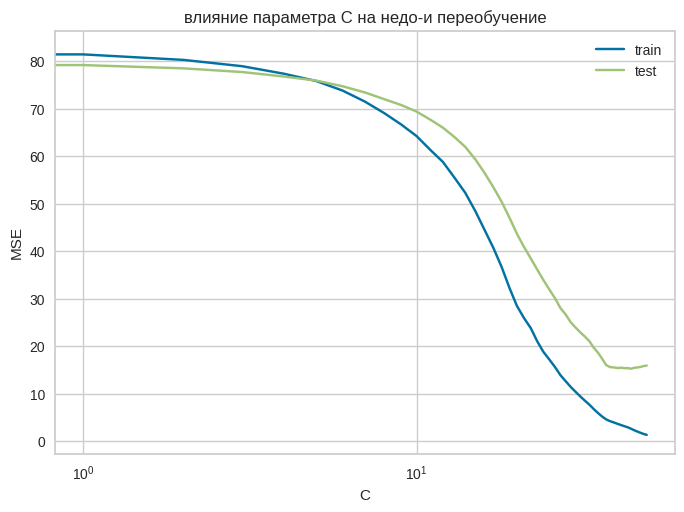

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

trains = []
tests = []
for i in np.logspace(-2, 3, 50):
    svm = SVR(C=i)
    svm.fit(X_train, y_train)
    train_pred = svm.predict(X_train)
    trains.append(mean_squared_error(y_train, train_pred))
    test_pred = svm.predict(X_test)
    tests.append(mean_squared_error(y_test, test_pred))

plt.plot(trains, label='train')
plt.plot(tests, label='test')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title('влияние параметра С на недо-и переобучение')
plt.legend()
plt.show()

ii

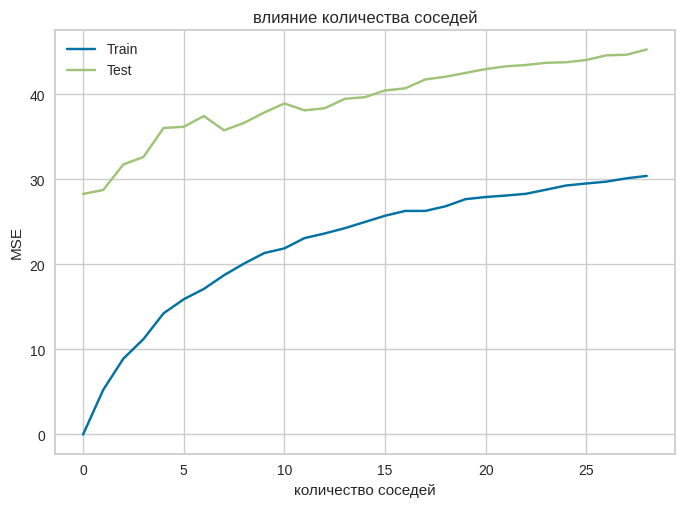

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

trains = []
tests = []
for i in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    trains.append(mean_squared_error(y_train, train_pred))
    test_pred = knn.predict(X_test)
    tests.append(mean_squared_error(y_test, test_pred))

plt.plot(trains, label='Train')
plt.plot(tests, label='Test')
plt.xlabel('количество соседей')
plt.ylabel('MSE')
plt.title('влияние количества соседей')
plt.legend()
plt.show()


iii

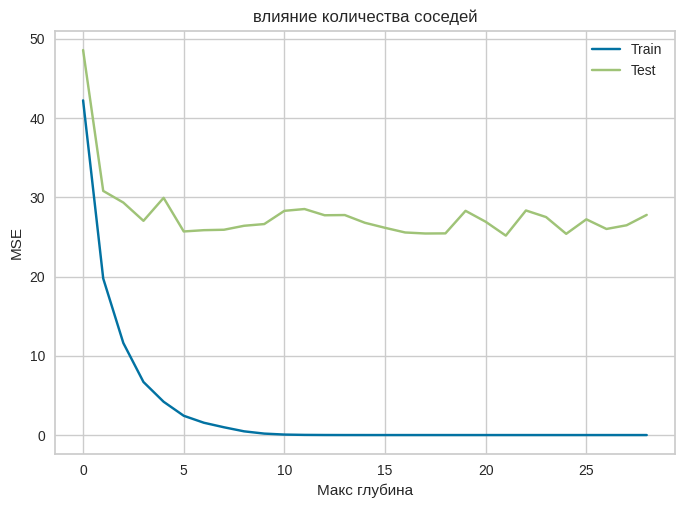

In [ ]:
from sklearn.tree import DecisionTreeRegressor

trains = []
tests = []
for i in range(1, 30):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    trains.append(mean_squared_error(y_train, train_pred))
    test_pred = dt.predict(X_test)
    tests.append(mean_squared_error(y_test, test_pred))

plt.plot(trains, label='Train')
plt.plot(tests, label='Test')
plt.xlabel('Макс глубина')
plt.ylabel('MSE')
plt.title('влияние количества соседей')
plt.legend()
plt.show()

3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [ ]:
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

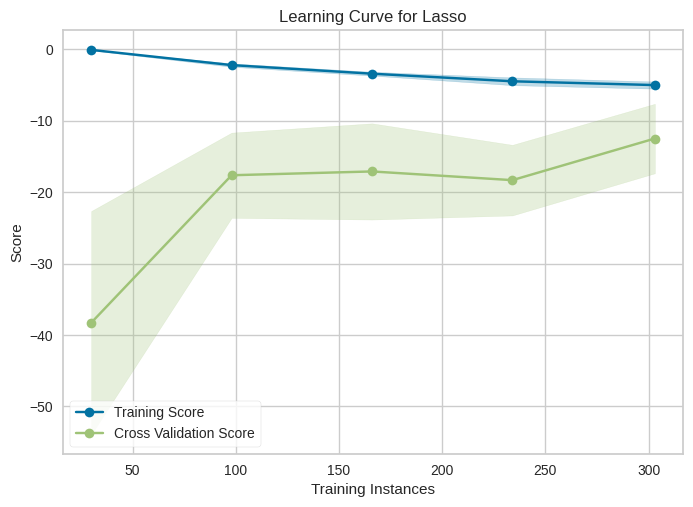

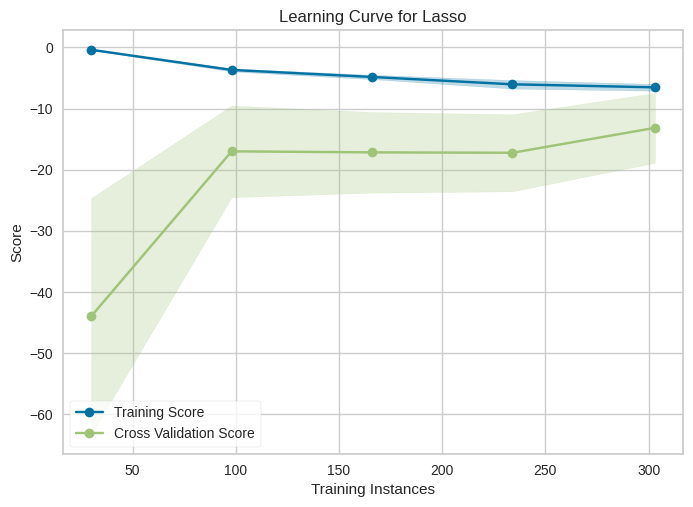

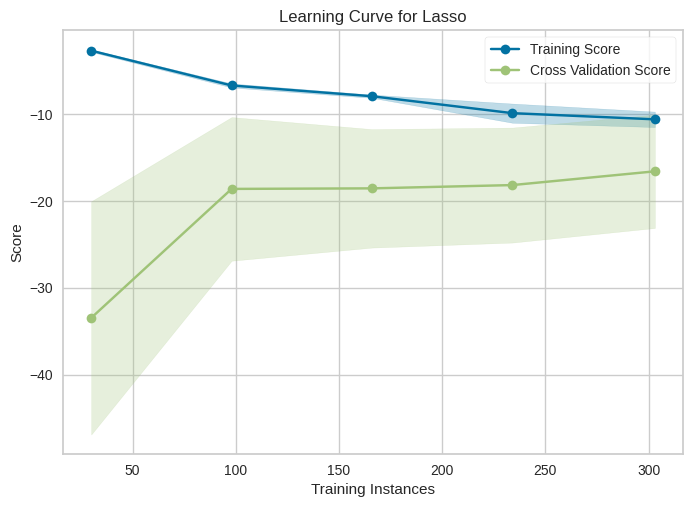

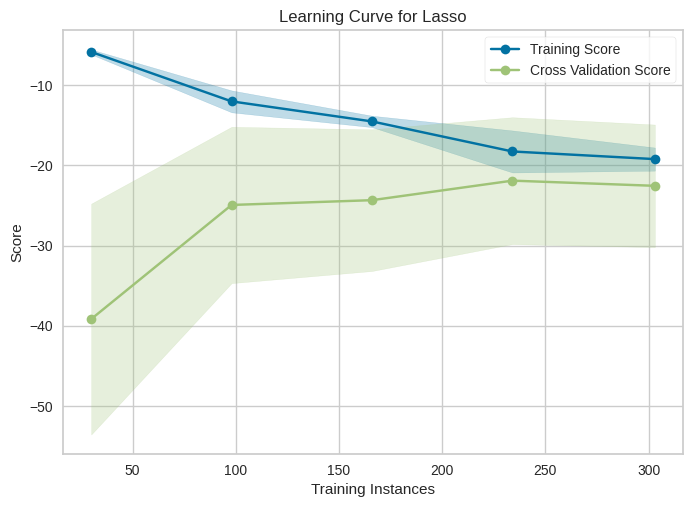

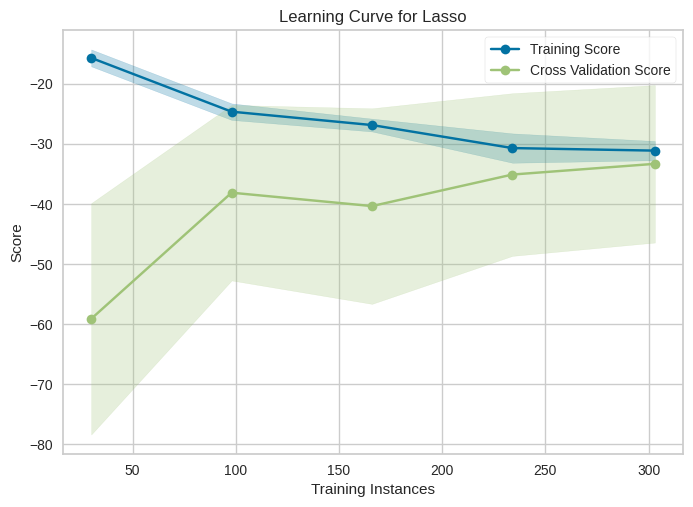

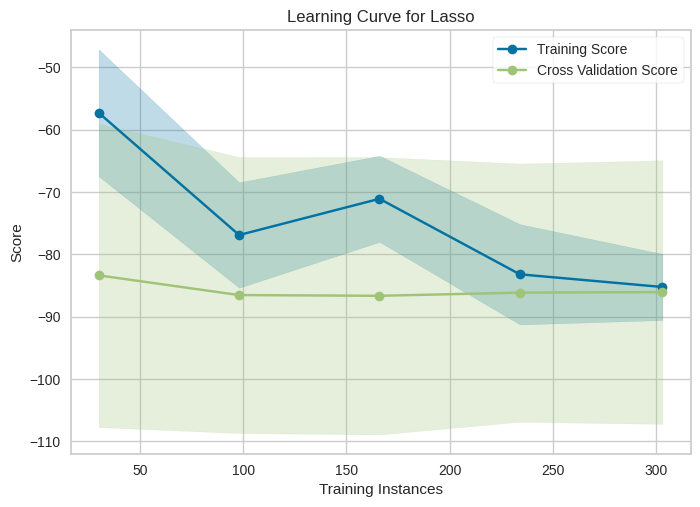

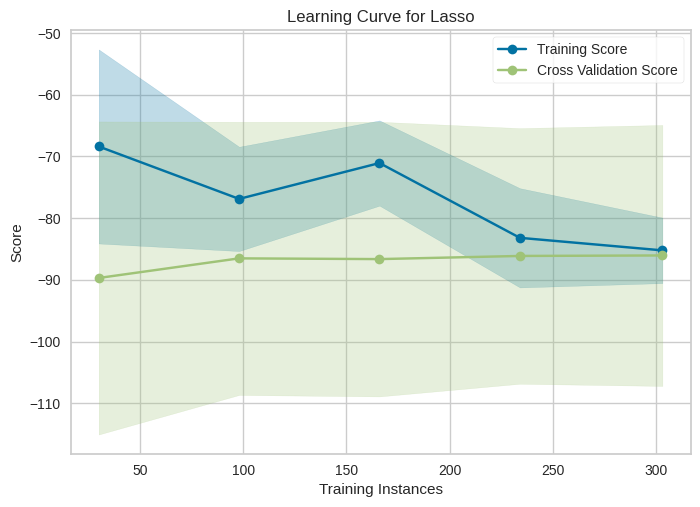

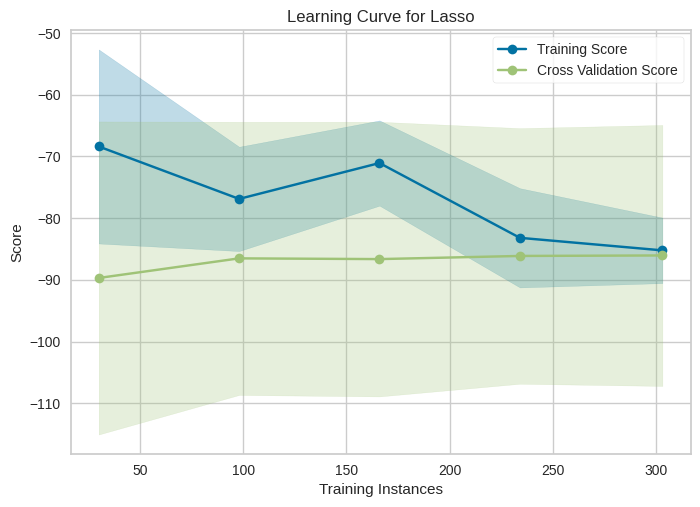

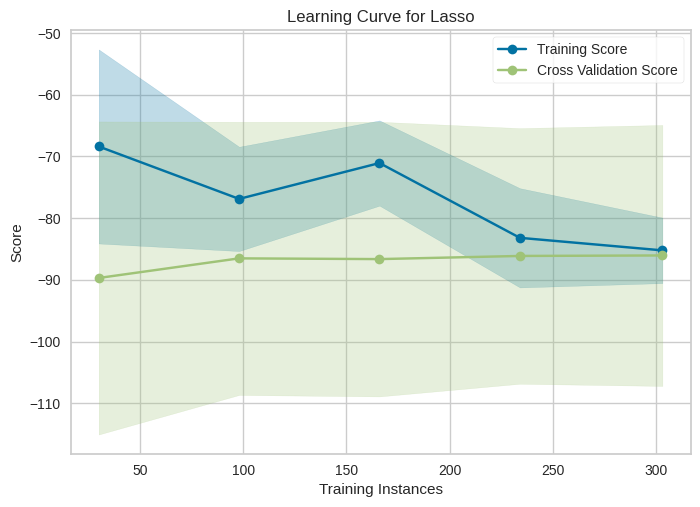

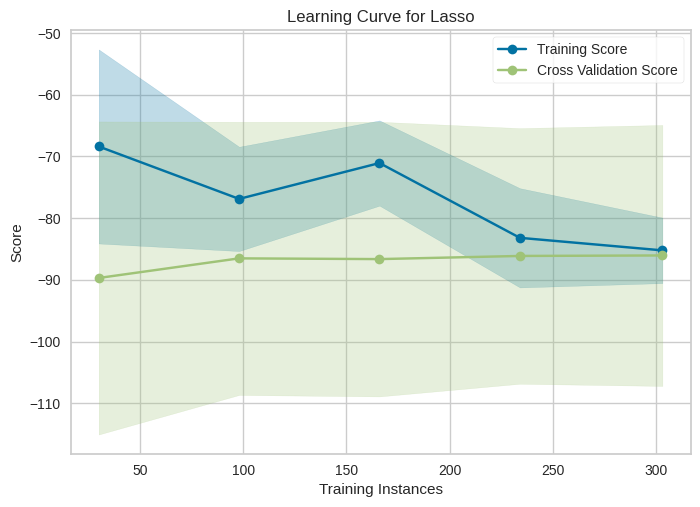

In [ ]:
from sklearn.linear_model import Lasso
for i in np.logspace(-3, 3, 10):
    lasso_model = Lasso(alpha=i, random_state=42)
    visualizer = LearningCurve(
        lasso_model, scoring='neg_mean_squared_error',
        n_jobs=-1).fit(X_train, y_train).show()

4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

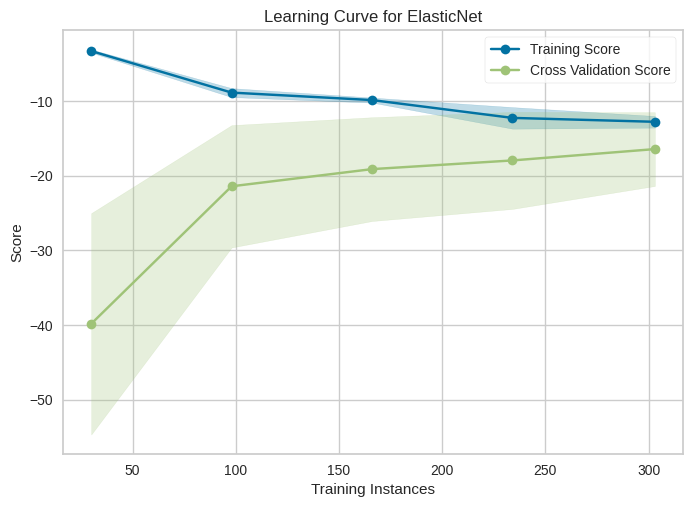

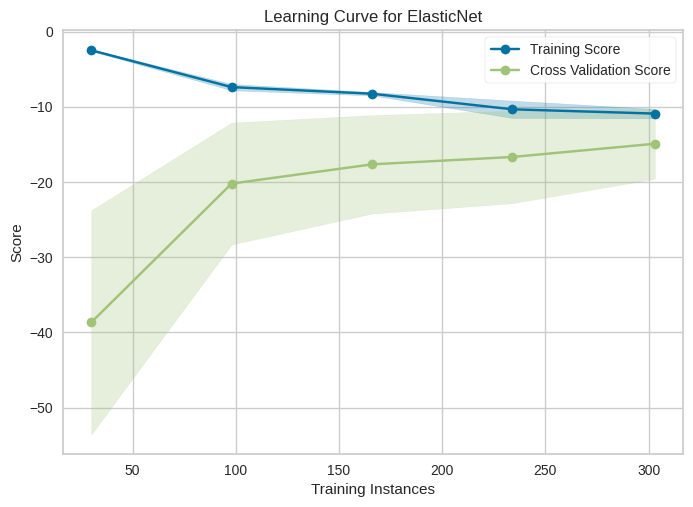

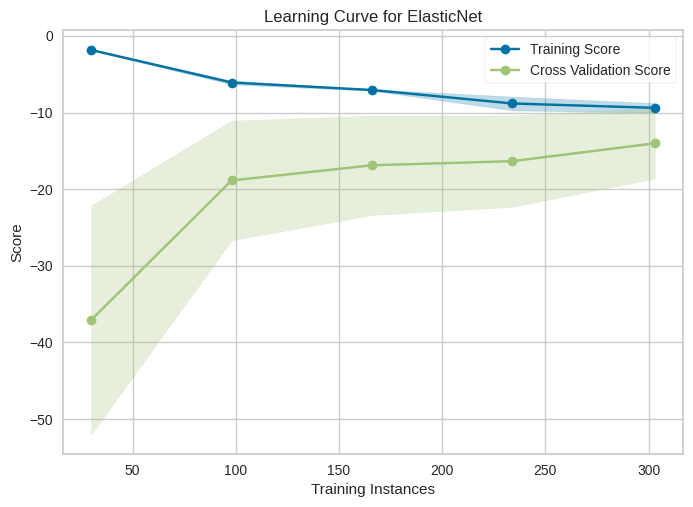

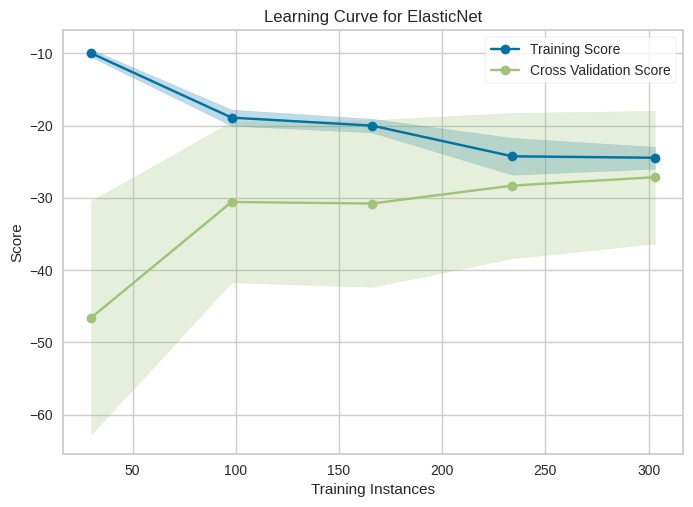

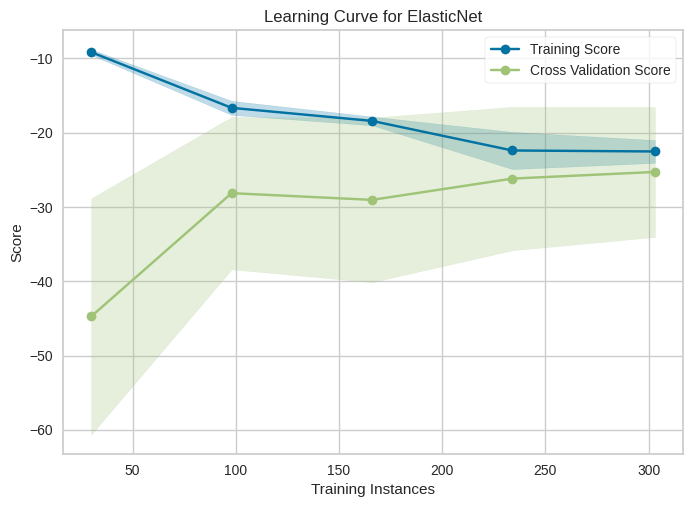

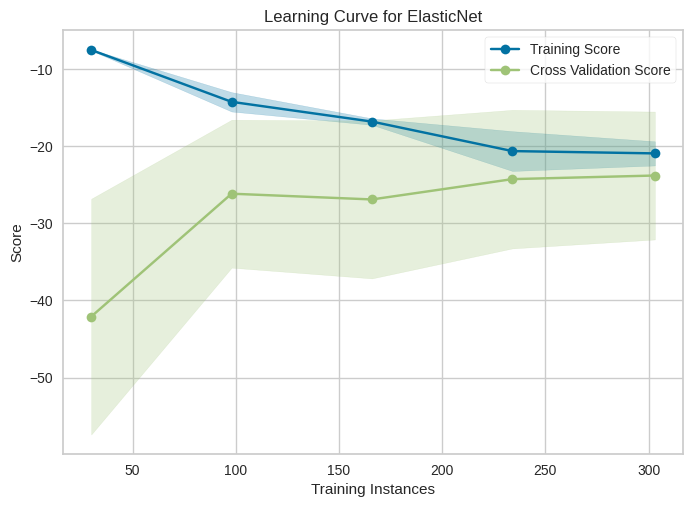

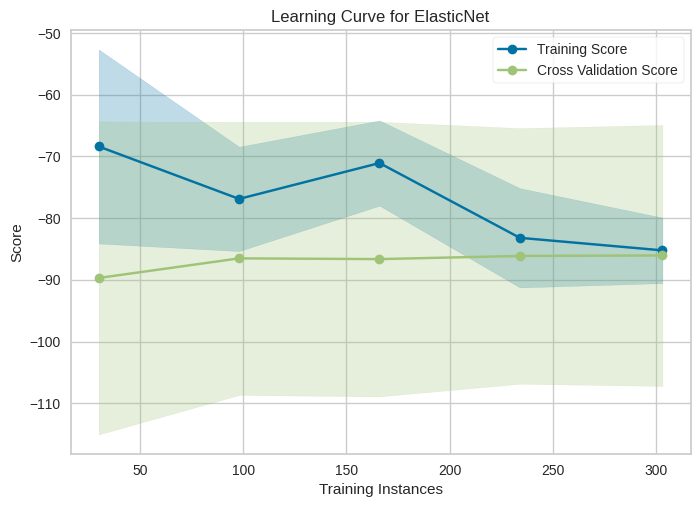

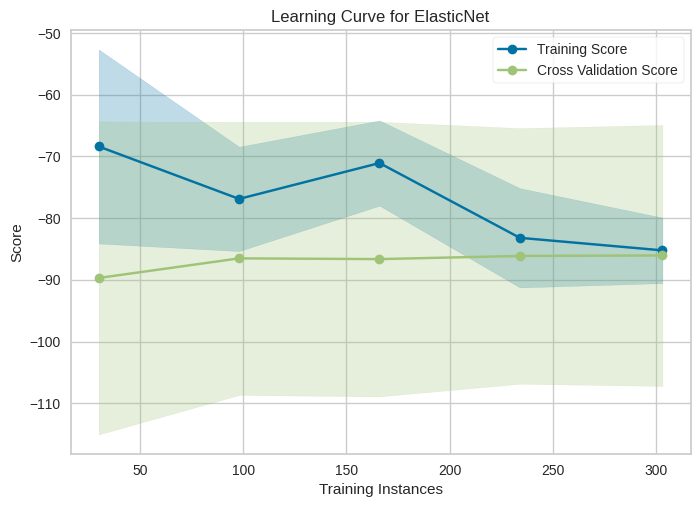

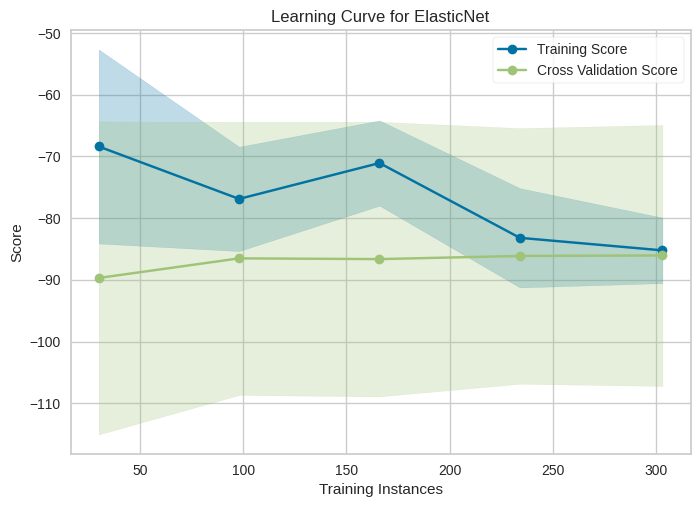

In [ ]:
from sklearn.linear_model import ElasticNet

for alpha in [0.01, 0.1, 10]:
    for l1_ratio in [0.3, 0.7, 0.9]:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        visualizer = LearningCurve(
            elasticnet_model,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        ).fit(X_train, y_train).show()

5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

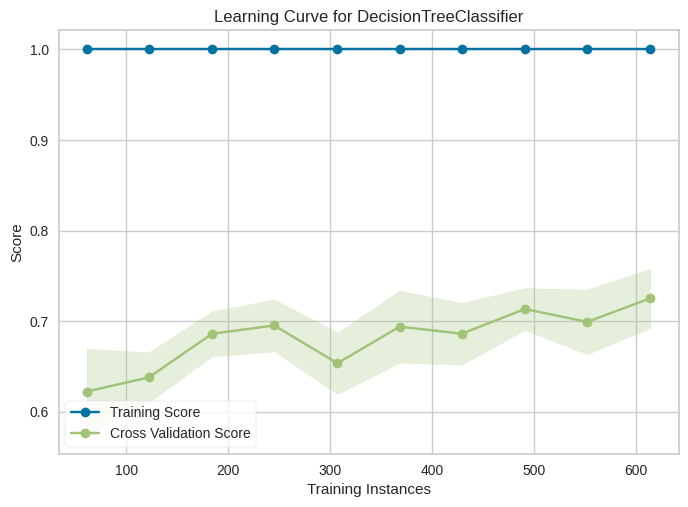

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

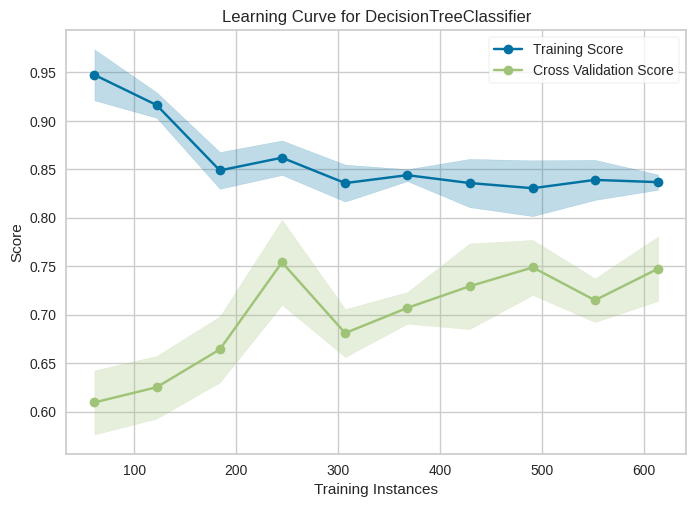

In [ ]:
model = DecisionTreeClassifier(random_state=1, max_depth = 5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

6. Повторите анализ на других реальных датасетах из репозитория OpenML: kropt

In [ ]:
from sklearn.datasets import fetch_openml
kropt = fetch_openml(name = "kropt")
print(kropt.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Classify a chess game based on the position of the white king, the white rook and the black king.

Downloaded from openml.org.


Классифицируйте шахматную партию на основе положения белого короля, белой ладьи и черного короля.

In [ ]:
X = kropt.data
y = kropt.target
X

,white_king_col,white_king_row,white_rook_col,white_rook_row,black_king_col,black_king_row
0,a,1,b,3,c,2
1,a,1,c,1,c,2
2,a,1,c,1,d,1
3,a,1,c,1,d,2
4,a,1,c,2,c,1
...,...,...,...,...,...,...
28051,b,1,g,7,e,5
28052,b,1,g,7,e,6
28053,b,1,g,7,e,7
28054,b,1,g,7,f,5


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   white_king_col  28056 non-null  category
 1   white_king_row  28056 non-null  category
 2   white_rook_col  28056 non-null  category
 3   white_rook_row  28056 non-null  category
 4   black_king_col  28056 non-null  category
 5   black_king_row  28056 non-null  category
dtypes: category(6)
memory usage: 166.3 KB


In [ ]:
y

0           draw
1           draw
2           draw
3           draw
4           draw
          ...   
28051    sixteen
28052    sixteen
28053    sixteen
28054    sixteen
28055    sixteen
Name: game, Length: 28056, dtype: category
Categories (18, object): ['draw', 'eight', 'eleven', 'fifteen', ..., 'three', 'twelve', 'two', 'zero']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

X = pd.get_dummies(X)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred)) # точности (accuracy) модели классификации
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7960


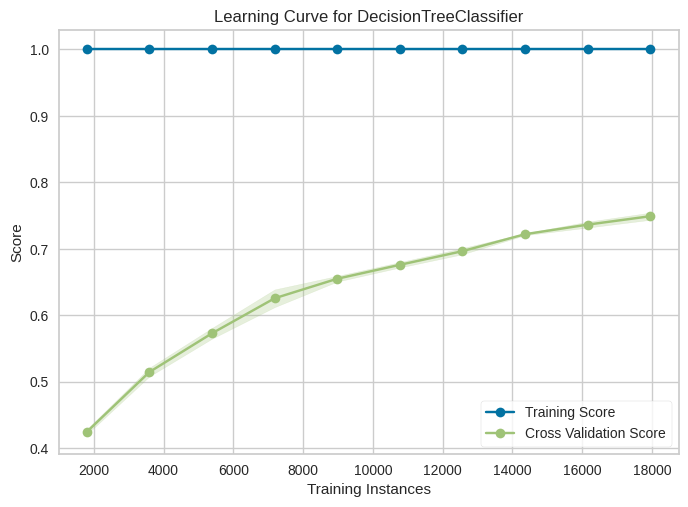

In [ ]:
# кривые обучения
visualizer = LearningCurve(
    DecisionTreeClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X_train, y_train).show()

In [ ]:
# максимальная глубина дерева влияет на склонность модели к переобучению
model = DecisionTreeClassifier(random_state=1, max_depth = 13).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.7003
Test score = 0.6304


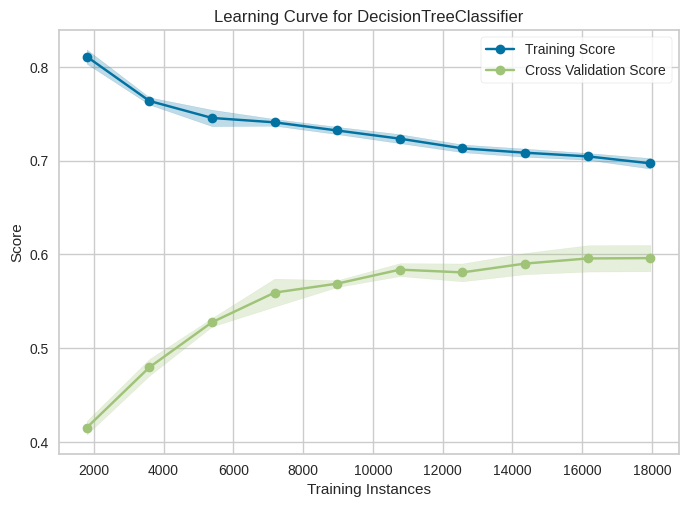

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1, max_depth = 13), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X_train, y_train).show()